# scikit-learn("사이킷런"이라고 읽는다) 패키지
머신러닝 교육을 위한 최고의 파이썬 패키지다. 
scikit-learn 패키지의 장점은 
다양한 머신러닝 모형을 하나의 패키지에서 모두 제공하고 있다는 점이다.
다음은 scikit-learn 패키지에서 제공하는 머신러닝 모형의 목록의 일부다.

- 데이터셋
  - 회귀분석, 분류, 클러스터링용 가상 데이터셋 생성
  - 각종 벤치마크 데이터셋

- 전처리
  - 스케일링
  - 누락데이터 처리
  - 텍스트 토큰화
    
- 지도학습
  - 회귀분석
  - LDA/QDA
  - 서포트벡터머신
  - 퍼셉트론, SGD
  - KNN
  - 가우스프로세스
  - 나이브베이즈
  - 의사결정나무
  - 랜덤포레스트, 부스팅

- 비지도학습
  - 가우스 혼합모형
  - 클러스터링
  - PCA

- 성능 최적화
  - 교차검증
  - 특징선택
  - 하이퍼파라미터 최적화
    
   

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

%matplotlib inline
from scipy.optimize import curve_fit

# scipy : optimization,interpolatrion, 미적분, fft 지원
# matlab 가능

#  polyfit과 poly1d의 사용법 - 최소제곱법과 polynomial class

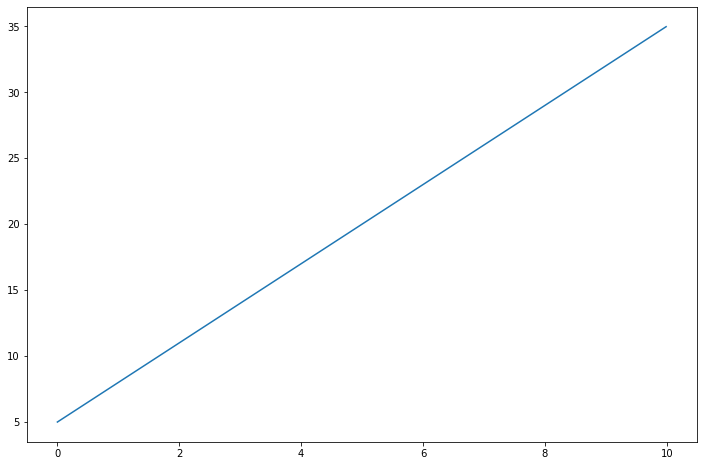

In [2]:
# 다중방정식 계수와 절편 구해주는 함수 polyfit()

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

t = np.arange(0, 10, 0.01)
y = 3*t + 5

plt.figure(figsize=(12,8))
plt.plot(t, y)
plt.show()

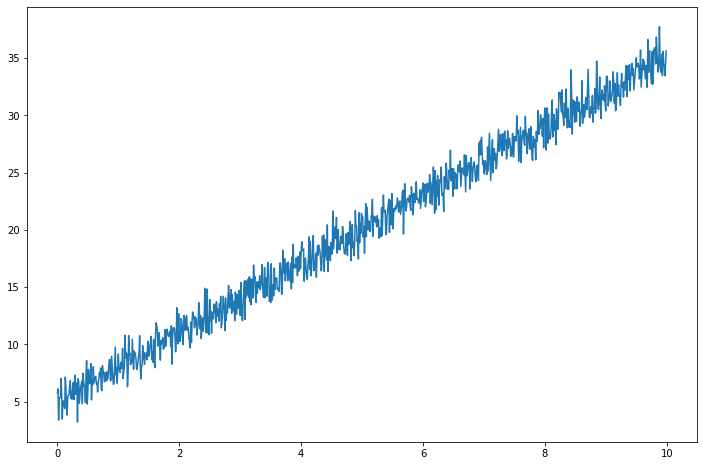

In [4]:
# 위의 1차원 = 1차방정식에 노이즈 추가
y_noise = y + np.random.randn(len(y))

plt.figure(figsize=(12,8))
plt.plot(t, y_noise)
plt.show()

In [8]:
#  x값과 y_noise=y값에 대해서 1차방정식으로 풀어라
# at + b 이므로 a, b 를 구함
fp1 = np.polyfit(t, y_noise, 1)
print(fp1)
print()# 1차 계수와 절편 구함

fp2 = np.polyfit(t, y_noise, 2)
print(fp2) # 2차방정식 ax^2+ bx + c    X^2의 계수,a / x의 계수 b, 절편 c구함 

fp3 = np.polyfit(t, y_noise, 3)  # 모델링 fitting 할때 계수와 절편 찾는것과 동일
print()
fp3

[3.00426442 5.00855334]

[-2.11913135e-04  3.00638143e+00  5.00503205e+00]



array([-4.38953946e-04,  6.36581174e-03,  2.98010999e+00,  5.02684830e+00])

### poly1d 함수를 사용 => 방정식 만들기

In [24]:
x=np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0])
y=np.array([0.0, 0.8, 0.9, 0.1,-0.8, -1.0]) #2개의데이터로 #fit : 방정식의 계수를 찾음 
z=np.polyfit(x,y,3) # => # poly 3차원으로 찾아라

print(x)
print()
print(y)

print()
print(z) # 3 차원 fitting : => 숫자 3개에 + 절편 : 총 4개의 데이터가 나옴


p=np.poly1d(z)  #3차원에서 구해진 계수 3개랑 절편 대입 => 방정식 만듦
p

[0. 1. 2. 3. 4. 5.]

[ 0.   0.8  0.9  0.1 -0.8 -1. ]

[ 0.08703704 -0.81349206  1.69312169 -0.03968254]


poly1d([ 0.08703704, -0.81349206,  1.69312169, -0.03968254])

In [25]:
p=np.poly1d(z)    # polyid 는 방정식으로 변환해준다 => 알아서 다 해줌
print("방정식으로 표현하면")
print(p)

p(0.5) # x에 대입


방정식으로 표현하면
         3          2
0.08704 x - 0.8135 x + 1.693 x - 0.03968


0.6143849206349201

In [27]:
print(p(3.5));print()
print(p(10))
p(3.0)

# 방정식에다가 수를 다 넣어보고 계산

-0.347321428571432

22.579365079365022


0.06825396825396512

## np.poly1d(np.polyfit(x,y,3)) => 3차원으로 방정식 변환

방정식
         3          2
0.08704 x - 0.8135 x + 1.693 x - 0.03968
-0.7126984126984173


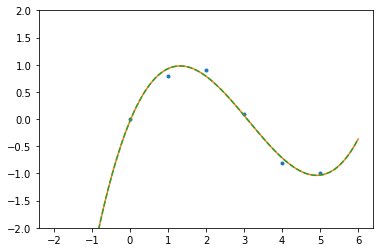

In [30]:
# p30 이라는 방정식을 만들자
p30=np.poly1d(np.polyfit(x,y,3)) # 방정식 변환

print("방정식")
print(p30)

print(p30(4))               # 방정식으로 구한값을 리턴


xp=np.linspace(-2,6,100)    # x축 : -2에서 6 까지 100등분한 수: 매계변수
plt.ylim(-2,2) # y축의 범위지정                         
_ = plt.plot(x, y, '.', xp, p(xp), '-', xp, p30(xp), '--')
# 플롯함수에 선을 지정해주는것 같음/ 잘 모름



plt.show()

# 최소자승법 (Least Square Method/ Regression)
파이썬을 활용한 금융 분석: 책에서 보면 <최소 자승 회귀법> 으로 간단한 함수에서 noise가 있거나 정렬되지 않은 함수의 근사까지 다양하게 응용함 
(1차원 함수뿐 아니라 => 다차원 함수까지 적용
 두가지 변수의 상관관계를 나타낸 산포도에서 x가 변할 때,
 y가 얼마나 변하는지 보여주는 직선회귀선을 그리는 데
 산포도의 점들과 가장 가까운 회귀선이 최소 자승 회귀선
 최소자승 회귀선 방정식은 x에 따라 y가 어떻게 될지 예측해준다

# 보간법 : interpolatrion
보간법은 x 차원의 정렬된 관측점이 주어졌을 때 두개의 이웃하는 관측점
사이의 자료를 계산하는 보간함수를 만드는 것. 
보간 함수는 관측점 자체도 정확하게 재현해야 하고 
각 관측점에서 연속 미분 가능한 함수이어야 함. 
(함수가 미분값이 존재하고 그 미분값이 연속일 경우 = 미분 가능)
 
 보간법을 적용하면 최소 자승 회귀법보다 더 정확한 근사결과 얻음.
 단점 : 자료가 정렬되어 있어야 하며 잡음이 없어야 하면 다차원 불가

# 최적화

옵션가격 계산을 위해 시장자료를 기반으로 인수교정을 하거나
대리인의 효용함수를 최적화 하는 경우

여러개의 국소최소점을 가지고 있다 -> 결과값 그림을 통해서


# 최적화 관련 = 우리책 내용 아님. 넘어가도 됨

In [32]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D # 3차원


def fm(p):
    x,y =p
    return(np.sin(x) + 0.05 * x**2 + np.sin(y) + 0.05* y**2)
              # x절편  + 계수 * 2차   +  y절편  + 계수 *2차

x=np.linspace(-10,10,50) # x축 -10 ~ 10 까지 50등분
y=np.linspace(-10,10,50) # y축 -10 ~ 10 까지 50등분

X, Y =np.meshgrid(x,y) # x, y 그리드 격자구조로 만듦
Z=fm((X,Y)) # 1차원 배열에서 2차원 그리드 생성



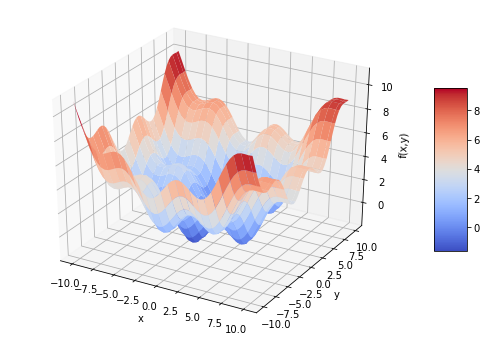

In [33]:
fig = plt.figure(figsize=(9,6))
ax=fig.gca(projection='3d') # 3차원으로 그려라
surf=ax.plot_surface(X,Y,Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm,
                    linewidth=0.5, antialiased=True)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

# 0의 기울기로 인해 멈춤 = momentum 가던 방향으로 진동를 더 줘서, 타고 넘어갈수 있게 momentom을 더 줌
# GD : gradient descent : 경사하강법 => ANN(Artificail neural netwark)

# 지역해문제 = (기울기=0자리) => 지역해 해결 momentum
# fitting 시간 문제 => 학습율 문제, 얼마나 학습할지 (fitting 한다고 함) 시간의 문제 => 처음시간을 많이 부여하고 점점 작게함

# Adam optimazor

### 위 그림: 주어진 x,y 구간에서의 함수형태 
이 함수가 여러개의 국소 최소점을 가지고 있다는 것을 알 수 있다

### 위 그림만으로는 전역최소점이 존재하는지 알기 어렵다

# 전역 최소화방법 / 국소 최소화 방법

### 최적화 라이브러리 => brute() / fmin() 함수이용

In [36]:
import scipy.optimize as spo 
def fo(p):
    x, y =p
    z=np.sin(x) + 0.05 * x**2 + np.sin(y) + 0.05 *y**2
    if output ==True:
        print('%8.4f, %8.4f, %8.4f' % (x,y,z))
    return z

# 최적화 과정을 수행할때 일어나는 일들을 더 자세히 살펴보기 위해
# 인수값과 함수값을 출력하도록 원래의 함수를 수정했다



# brute()함수 
무작위로 조합을 넣음 /범위를 입력해야함
### x,y 범위 (-10,10.1, 5) : 즉 -10 ~ 10.1 까지,5 간격  

In [39]:
output=True # 조합을 보여줘라 => print
# 최적화 과정에서 발생하는 일련의 과정을 조합으로 추적

opt1 = spo.brute(fo, ((-10,10.1, 5), (-10, 10.1, 5)), finish=None) 
opt1

# brute() 를 통해 x = -10, 5, 0, 5, 10 일때
# y= 값을 각각 대입해서 테스트
 # 조사간격을 5로 느슨하게 사용한 결과

-10.0000, -10.0000,  11.0880
-10.0000,  -5.0000,   7.7529
-10.0000,   0.0000,   5.5440
-10.0000,   5.0000,   5.8351
-10.0000,  10.0000,  10.0000
 -5.0000, -10.0000,   7.7529
 -5.0000,  -5.0000,   4.4178
 -5.0000,   0.0000,   2.2089
 -5.0000,   5.0000,   2.5000
 -5.0000,  10.0000,   6.6649
  0.0000, -10.0000,   5.5440
  0.0000,  -5.0000,   2.2089
  0.0000,   0.0000,   0.0000
  0.0000,   5.0000,   0.2911
  0.0000,  10.0000,   4.4560
  5.0000, -10.0000,   5.8351
  5.0000,  -5.0000,   2.5000
  5.0000,   0.0000,   0.2911
  5.0000,   5.0000,   0.5822
  5.0000,  10.0000,   4.7471
 10.0000, -10.0000,  10.0000
 10.0000,  -5.0000,   6.6649
 10.0000,   0.0000,   4.4560
 10.0000,   5.0000,   4.7471
 10.0000,  10.0000,   8.9120


array([0., 0.])

In [42]:
# 최적인수 값  x = y = 0 일때로 나옴
# 0~ 1 사이에서 더 최적인수가 있지 않을까?
# 이번에는 조사간격을 0.1 로 매우 타이트하게 조사해보면
# 더 미세하게 0과 5사이로 최적인수값을 확인했다 결과값 x = y= -1.4


output=False
opt1 = spo.brute(fo, ((-10,10.1, 0.1), (-10, 10.1, 0.1)), finish=None) # 간격을 0.1, brute()함수 : 무작위로 조합을 넣음

print(opt1)
# 내가 만든 함수 fm() 에 넣어서 확인
# def fm(p):
#    x,y =p
#    return(np.sin(x) + 0.05 * x**2 + np.sin(y) + 0.05* y**2)
             
fm(opt1)

# 행렬곱을 이용해서  ANN 으로 최적해를 찾는다
# 최적인수 값 x = y = -1.4
# 전역 최소화 지점에서 함수값 -1.7748

[-1.4 -1.4]


-1.7748994599769203

# 전역 최적화 후 => 국소 최적화 진행

- 대부분의 최적화 문제에서 국소 최솟값을 구하기전에 전역 최소화를 권장
- 그 이유는 국소최소화 알고리즘이 일단 어떤 국소 최저점에 빠져버리면
- 더 나은 국소 최솟값이나 전역 최솟값을 찾아내지 못하기 때문


# fmin()  함수
 최소화하려는 함수와 시작인수값을 입력으로 받음.

# (fo, opt1,  )
최소화하려고 만든 사용자 정의함수 fo, op1 최적인수값 넣음.

In [49]:
# 위의 전역 최적화 결과를 기반으로 =>  국소 최적화 진행하기
output=True      
opt2 =spo.fmin(fo, opt1,  ### 전역최소화지점 함수값 op1 으로 알아냄
               xtol=0.001, ftol=0.001)         
print(),print("전역최소화지점 최적인수의 값이 더 정확해짐")
print(opt2)

# 전역최적화 opt1 결과 [-1.4 -1.4]
#최적인수의 값이 더 자세히 정화해지고 최소함수값이 더 낮아졌다
fm(opt2)

# 추가적으로 인수나 함수값의 허용오차 수준을 정의하거나 
# 반복계산 최대 횟수를 정할수도 있다 =파이썬을 활용한 금융 분석: 파이썬의 기초부터 금융공학, 수학, 정량 분석
#    (책에 나온 예제 : 선생님 설명도....)

 -1.4000,  -1.4000,  -1.7749
 -1.4700,  -1.4000,  -1.7743
 -1.4000,  -1.4700,  -1.7743
 -1.3300,  -1.4700,  -1.7696
 -1.4350,  -1.4175,  -1.7756
 -1.4350,  -1.3475,  -1.7722
 -1.4088,  -1.4394,  -1.7755
 -1.4438,  -1.4569,  -1.7751
 -1.4328,  -1.4427,  -1.7756
 -1.4591,  -1.4208,  -1.7752
 -1.4213,  -1.4347,  -1.7757
 -1.4235,  -1.4096,  -1.7755
 -1.4305,  -1.4344,  -1.7757
 -1.4168,  -1.4516,  -1.7753
 -1.4305,  -1.4260,  -1.7757
 -1.4396,  -1.4257,  -1.7756
 -1.4259,  -1.4325,  -1.7757
 -1.4259,  -1.4241,  -1.7757
 -1.4304,  -1.4177,  -1.7757
 -1.4270,  -1.4288,  -1.7757
 -1.4316,  -1.4307,  -1.7757
 -1.4273,  -1.4258,  -1.7757
 -1.4239,  -1.4285,  -1.7757
 -1.4288,  -1.4266,  -1.7757
 -1.4285,  -1.4297,  -1.7757
 -1.4276,  -1.4267,  -1.7757
 -1.4258,  -1.4289,  -1.7757
 -1.4281,  -1.4272,  -1.7757
 -1.4286,  -1.4252,  -1.7757
 -1.4274,  -1.4279,  -1.7757
 -1.4279,  -1.4283,  -1.7757
 -1.4277,  -1.4271,  -1.7757
Optimization terminated successfully.
         Current function value: -

-1.7757255920546628

In [59]:
output=False
opt2 =spo.fmin(fo, opt1,  ### 전역최소화지점 함수값 op1 으로 알아냄
               xtol=0.001, ftol=0.001,maxiter=15, maxfun=20)  

# 반복최대횟수  maxiter=15,  maxfun=20 둘중 뭘 넣어도 에러나,
#Maximum number of function evaluations has been exceeded.

In [60]:
# 아례는 인수값을 x=y=2 로 했을때 최소값이 커진다

output=False
spo.fmin(fo, (2.0, 2.0), maxiter=250) 

#갑자기 왜 설명? 활강단체법 (downhill simplex method)은 
#다차원 공간의 손실함수의 최솟값 또는 최댓값을 찾기 위한 수치적 방법이다.
#도함수를 알 수 없는 비선형 최적화 문제 상황에서 사용

Optimization terminated successfully.
         Current function value: 0.015826
         Iterations: 46
         Function evaluations: 86


array([4.2710728 , 4.27106945])

In [ ]:
https://books.google.co.kr/books?id=crpUDwAAQBAJ&pg=PA305&lpg=PA305&dq=spo.fmin&source=bl&ots=zEOwcH1gHM&sig=ACfU3U1d0T709SJZmlZz34pF7kOf2g149Q&hl=ko&sa=X&ved=2ahUKEwjUzaf-xf_mAhX0yosBHSlqAvEQ6AEwBHoECAgQAQ#v=onepage&q=spo.fmin&f=false

# 선형회귀 (linear regression) : 

선형회귀 모델에 fit 해주면 알아서 기울기=계수, 절편 구해줌

# 기울기와 절편을 찾음 => 하이퍼파라미터

- <전제조건 = 통계학에서 >
- 선형성 : 비선형성 => scikits 에서는  ploynomial(위의 방정식) + LR  
  => 선형회귀를 이용해서 비선형을 풀어낸다
  (비선형:과적합되버림) = 비선형을 배제하면 bias 커짐. 
                          (target 값에서 멀어짐)
           
- 정규성 : 오차가 정규분포를 띈다.
 >>각각의 관측치 주변으로 정규분포하게 오차가 있고, 관측치로 멀어지면 오차가 줄어든다고 가정함
    정규분포의 문제를 해결=> 뭔지 모르겠음 GLS (일반화회귀분석?? Generalized Least Squares)
           
- 독립성 : 변수간의 다중공선성이 있으면 안됨 (=>과적합됨)
  하나의 변수에 자기회귀(AR)가 있으면 안됨 가정. => (AR :시계열분석)

           = scikits : 다중공선성을 lasso(절대값규제), Ridge(제곱),                                           ElasticNet(lasso+Ridge) 으로 해결함

           = Regulization은 에러가 이미 존재한다고 보고 회귀
 
- 등분산성 : 이산성 고려한 모델을 사용

In [66]:
from sklearn.datasets import make_regression # 회귀분석용 가상데이터생성
import statsmodels.api as sm


# make_regression() 함수로 만들어진 데이터는 종속변수 y의 값이
# 독립변수 x벡터의 선형조합인 선형관계를 가진다

bias=100  # 절편=100
X0, y, w = make_regression(       # x=0 일때 가질수 있는 y 값: 절편
    n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=1)
#     200개의 샘플      속성 =1                             default=False
#    default =100   독립변수 수(차원) n_target default y=1

# 선형회귀시 범주형은 상수로 등록
# statsmodels 에서 회귀분석시 상수별로 회귀분석을 실행함

X0[:5, :] # (200x1) 5개만 뽑아서 확인


array([[ 0.23249456],
       [-0.03869551],
       [ 0.5505375 ],
       [ 0.50318481],
       [ 2.18697965]])

In [71]:
print(y[:5,]) # y값도 (1x200) => X0 와 다른 shape

# 상수항 결합 add_constant() 함수
상수항이 0이 아닌 회귀분석모형인 경우에는 수식을 간단하게 하기 위해
상수항을 독립변수에 추가한다 => 상수항 결합
상수항결합후 모든 원소가 1인 벡터가 데이터 행렬 1열에 세로로 추가됨 

X=sm.add_constant(X0) # 상수:절편을 고려해라 
print(X[:10, :]) #결과값 보면 상수 1이 생김. (2x200) => X는 2차방정식

w # x의 계수 출력

[127.87901739  93.03291422 161.8575084  141.69205026 283.26011945]
[[ 1.          0.23249456]
 [ 1.         -0.03869551]
 [ 1.          0.5505375 ]
 [ 1.          0.50318481]
 [ 1.          2.18697965]
 [ 1.         -0.0731127 ]
 [ 1.         -0.26788808]
 [ 1.         -1.62743834]
 [ 1.          0.53035547]
 [ 1.          0.16938243]]


array(86.44794301)

Text(0.5, 1.0, 'make_regression example')

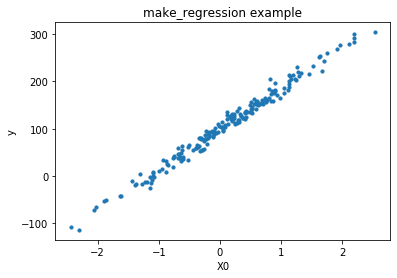

In [73]:
plt.scatter(X0, y, s=10) # s 는 포인트 크기
plt.xlabel("X0") #(200x1)
plt.ylabel("y")  #(1x200)
plt.title("make_regression example")

# 200개의 데이터 그려줌 y= w(계수)X0 => 86.447 * X0

# statsmodels패키지

- 예제 데이터셋
- 검정 및 모수추정
- 회귀분석
  - 선형회귀
  - 강건회귀
  - 일반화 선형모형
  - 혼합효과모형
  - 이산종속변수
시계열 분석
  - SARIMAX 모형
  - 상태공간 모형
  - 벡터 AR 모형
생존분석
요인분석

아래 예제에서 선형회귀분석, 로지스틱회귀분석, 
시계열분석에서 statsmodels 패키지를 사용한다.

### state model 패키지 사용시 api 서브패키지 import
- state model 패키지의 개발 목표중  
기존에 R을 사용하여 통계분석 및시계열 분석을 사용하던 사용자가
파이썬에서도 동일한 분석을 할 수 있도록 하는것.
R에서 사용하던 1000개이상의 표준 데이터셋을 사용할 수 있도록 지원


### statsmodel 패키지
- 검정 및 추정 test and estimation)
- 회귀 분석 (regression analysis)
- 시계열분석 time-series analysis) 등의 다양한 통계분석기능 제공

# NumPy를 이용한 선형 회귀분석

회귀분석 => 잔차제곱합을 최소화하는 가중치벡터로 선형회귀선 구하기
:OLS 이용

# OLS : Ordinary Least Squares
가장 기본적인 결정론적 선형 회귀 방법으로 
잔차제곱합(RSS: Residual Sum of Squares)를 최소화하는 
가중치 벡터를 행렬 미분으로 구하는 방법이다.

In [179]:
from sklearn.datasets import make_regression 
import statsmodels.api as sm
bias=100  # 절편=100
X0, y, w = make_regression(       
    n_samples=200, n_features=1, bias=bias, 
    noise=10, coef=True, random_state=1)

#위에서 만든 1차원 데이터 X0 와 이 값에 의존하는 값 종속변수 y 생성
# y= 100 (bias) + 86.44794301(w) 값 x + ϵ (노이즈)
print(w)

y = y.reshape(len(y), 1) #(1x200) =>(200x1) => 행렬변환
X=sm.add_constant(X0) #(2x200)
X[:5,]


86.44794300545998


array([[ 1.        ,  0.23249456],
       [ 1.        , -0.03869551],
       [ 1.        ,  0.5505375 ],
       [ 1.        ,  0.50318481],
       [ 1.        ,  2.18697965]])

In [180]:
import numpy as np
# 행렬곱 연산자 => ANN 내적은 인공신경망에서 쓰나?? 자꾸 왜 언급?

# w= 86.44794301 로 나왔었는데 => X=sm.add_constant(X0) 상수항 추가후


# OLS 해를 직접 이용하는 방법으로 역행렬 함수 수식을 이용해서 
# 선형회귀 계수를 추정할 수 있다

w1 = np.linalg.inv(X.T @ X) @X.T @ y 
w1 #ANN(artifitial neural network) 으로 구해짐 = 2차 (상수항 결합땜에?)

array([[99.79150869],
       [86.96171201]])

In [181]:
# lstsq 명령을 이용하는 방법 # OLS 이용방법과 동일한 값 추출
w1 = np.linalg.lstsq(X, y)[0]
w1

C:\Users\ICT01_02\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


array([[99.79150869],
       [86.96171201]])

-2.434837764107139
2.528325706806398


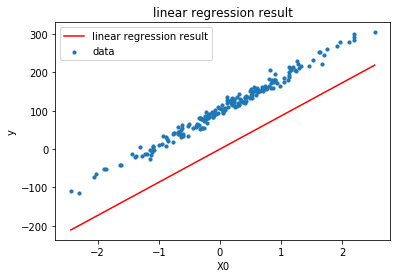

In [188]:
print(np.min(X0)),print( np.max(X0))
   # x축 : -2.4348 에서  2.5283 까지 100등분한 수: 매계변수

x_grid = np.linspace(np.min(X0), np.max(X0), 100) 
X_= sm.add_constant(x_grid)  # 상수항 결합
y_grid = np.dot(x_grid, w)


plt.scatter(X0, y, s=10, label="data") # s 는 포인트 크기
plt.xlabel("X0"), plt.ylabel("y")

plt.plot( x_grid, y_grid, 'r-', label="linear regression result")
plt.title("linear regression result")
plt.legend() # 선형회귀선이 잘못그려짐.......... 점위에 그려져야함
plt.show()

In [183]:
https://datascienceschool.net/view-notebook/58269d7f52bd49879965cdc4721da42d/

SyntaxError: invalid syntax (<ipython-input-183-faf783262a09>, line 1)

In [155]:
# y^(선형모델 표기)= 99.79150869 (w1) + 86.96171201(w1) x
# 위에서 구한 계수로 선형모델을 예측할 수 있다

model =sm.OLS(y, X)  # X 는 상수항이 결합된 선형모형
result = model.fit() #fitting 선형회귀 모델 가중치벡터 행렬미분 OLS 실행
result.summary()


# R-squared => 설명력 : 회귀제곱합/ 총오차제곱합
# Model:	OLS ordinary least square
# Adj. R-squared 모델을 통해 수정된 값을 쓴다
# F-statistic value : 분산비 1.278e+04
# F분포비에 대한 확률값 Prob (F-statistic):	8.17e-182 : 0.00000001 모델은 유의미하다


model 평가.
#AIC:	1487  Akaike 정보 기준입니다. 값이 작을수록 더 나은 모델입니다.
AIC 값은 두 모델의 관측치 개수가 거의 동일할 때만 비교해야 합니다. AIC 값은 음수일 수 있습니다. 
AIC는 반응 변수의 실제 분포와 모델에 지정된 분포 사이의 불일치에 대한 Kullback-Leibler 정보 측도를 기반으로 합니다.
#BIC:	1493  
모델의 잔차 제곱합과 효과 수를 증가시키는 함수입니다. 
반응 변수와 효과 수에 대한 설명되지 않은 변동은 BIC 값의 증가로 이어집니다. 
결과적으로, BIC 값이 낮으면 설명 변수 또는 적합 항목이 적거나, 아니면 둘 다 적다는 것을 의미합니다. 
BIC는 AIC보다 자유 모수에 더 강력하게 패널티를 적용합니다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Thu, 16 Jan 2020   Prob (F-statistic):          8.17e-182
Time:                        20:38:54   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.7915      0.705    141.592      0.000      98.402     101.181
x1            86.9617      0.769    113.058      0.000      85.445      88.479
==============================================================================
Omnibus:                        1.418   Durbin-Watson:                   1.690
Prob(Omnibus):                  0.492   Jarque-Bera (JB):                1.059
Skew:                           0.121   Prob(JB):                        0.589
Kurtosis:                       3.262   Cond. No.                         1.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
Durbin-Watson 통계량을 사용하여 회귀 모형의 오차에 자기 상관이 있는지 검정
    자기 상관은 인접 관측치의 오차가 상관되어 있음을 의미합니다. 
    오차가 상관되면 최소 제곱법이 계수의 표준 오류를 과소 추정할 수 있습니다. 
    표준 오차가 과소 추정되면 예측 변수가 유의하지 않은데 유의한 것으로 보일 수 있습니다.

Skew : 외도의 기준점에서 얼마나 벗어났나
Kurtosis 기준점. 표준정규분포가 : 3 => 얼마나 벗어나나
    
Jarque-Bera    시계열의 정규분포 여부를 검정
Cond. No. : 다중공선성 값

In [81]:
print(w);print() # 계수출력
print(w1) #ordinary least sqaure = OML 로 구한 계수

# w 근사값이 나옴 
result.params

86.44794300545998

[[99.79150869]
 [86.96171201]]


array([99.79150869, 86.96171201])

In [ ]:
# OLS 말고 선형회귀모델에 바로 넣어서 구해도 됨.
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X0, y)
print(model.coef_, model.intercept_)
# intercept : 절편,  coefficient계수

In [163]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

boston = load_boston() #보스톤 집값에 대한 예측

# boston 데이터를 보기 위해 일단 데이터프레임으로 확인

dfX=pd.DataFrame(boston.data, columns=boston.feature_names) # x: 독립변수
dfy = pd.DataFrame(boston.target, columns=['MEDV'])         # y:종속변수

print(dfy) 
# 평균값으로 집값예측 
dfX 

     MEDV
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
..    ...
501  22.4
502  20.6
503  23.9
504  22.0
505  11.9

[506 rows x 1 columns]


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [164]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [170]:
#boston.feature_names 독립변수들 변수 13개 =>  종속변수 MEDV 
#                                :계수 13개 =13차 방정식
# 선형회귀에 fitting
# fit : 계수(parameter) 를 구해줌

model_boston = LinearRegression().fit(boston.data, boston.target)

# 모델에 fitting 후 확인가능 =>계수, 절편

print(model_boston.intercept_) # intercept : 절편
model_boston.coef_ #13개의 독립변수의  coefficient계수

36.459488385089855


array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [171]:
# 예측기에 보스턴집값 데이터를 넣어서
# 각각의 집값을 예측함.

predictions = model_boston.predict(boston.data)


#predictions 각각의 예측값에서 - MEDV 중간가격을 빼주면 잔차
predictions - boston.target # 잔차들

array([ 6.00384338e+00,  3.42556238e+00, -4.13240328e+00, -4.79296351e+00,
       -8.25647577e+00, -3.44371554e+00,  1.01808268e-01, -7.56401157e+00,
       -4.97636315e+00,  2.02621071e-02,  3.99949651e+00,  2.68679568e+00,
       -7.93478472e-01, -8.47097189e-01,  1.08348205e+00, -6.02516792e-01,
       -2.57249021e+00, -5.88598653e-01, -4.02198894e+00,  2.06136033e-01,
       -1.07614247e+00, -1.92896331e+00,  6.32881292e-01, -6.93714654e-01,
        7.83383155e-02, -5.13314391e-01, -1.13602345e+00, -9.15257194e-02,
        1.14737285e+00, -1.23571798e-01, -1.24488241e+00,  3.55923295e+00,
       -4.38894264e+00,  1.18275814e+00,  2.06758913e-01,  4.91463526e+00,
        2.34193708e+00,  2.10891142e+00, -1.78497388e+00,  5.57625688e-01,
       -6.84897746e-01,  1.42056414e+00, -9.61337195e-02, -9.02072745e-02,
        1.74149176e+00,  2.79669817e+00,  4.23200323e-01,  1.43655088e+00,
       -5.29344623e+00, -2.19392249e+00,  1.58152535e+00,  3.47222285e+00,
        2.65585080e+00,  

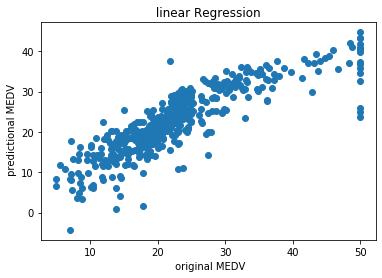

In [172]:
plt.scatter(boston.target, predictions)
plt.xlabel(u" original MEDV")
plt.ylabel(u" predictional MEDV")
plt.title(" linear Regression ")
plt.show()

In [174]:
dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
result_boston2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 16 Jan 2020   Prob (F-statistic):          6.72e-135
Time:                        20:56:42   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""